In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('./dataset/processed_dataset.csv')

In [3]:
# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

df_encoded.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


### Prepare dataset for model building

In [4]:
x = df_encoded.drop(columns=['diabetes'])
y = df_encoded['diabetes']

# Verify the remaining features in X
print("Features for model building:")
print(x.columns)

Features for model building:
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')


### Building model

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


train_scores = []
test_scores = []

for i in range (1,20):
    knn_model = KNeighborsClassifier(i)
    knn_model.fit(X_train, y_train)
    train_scores.append(knn_model.score(X_train, y_train))
    test_scores.append(knn_model.score(X_test,y_test))

In [6]:
max_train_score = max(train_scores)
train_scores_index = [i for i, v in enumerate(train_scores) if v == max_train_score]
print("Max Train score {} % and k = {}".format(max_train_score*100, list(map(lambda x : x+1, train_scores_index))))

Max Train score 99.94502392202313 % and k = [1]


In [7]:
max_test_socre = max(test_scores)
test_score_index = [i for i, v in enumerate(test_scores) if v == max_test_socre]
print("Max Test score {} % and k = {}".format(max_test_socre*100, list(map(lambda x : x+1, test_score_index))))

Max Test score 95.15323810844542 % and k = [7]


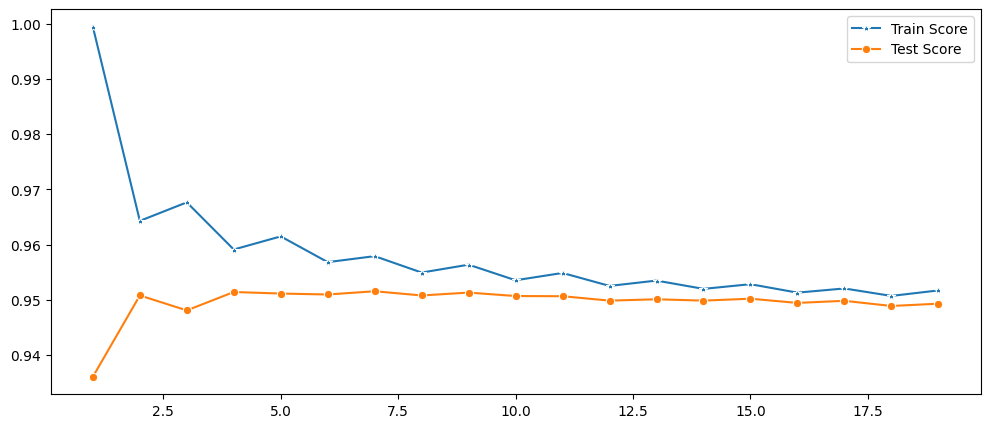

In [8]:
plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 20), y=train_scores, marker="*", label='Train Score')
p = sns.lineplot(x=range(1, 20), y=test_scores, marker="o", label='Test Score')

In [9]:
knn_model = KNeighborsClassifier(7)
knn_model.fit(X_train, y_train)
knn_model.score(X_test,y_test)

0.9515323810844543

In [10]:
y_pred = knn_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[26124,   143],
       [ 1255,  1322]], dtype=int64)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     26267
           1       0.90      0.51      0.65      2577

    accuracy                           0.95     28844
   macro avg       0.93      0.75      0.81     28844
weighted avg       0.95      0.95      0.95     28844

